###  Importing Libraries

In [186]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statistics as stats

###  Importing dataset

In [187]:
oil=pd.read_csv(r"C:\Users\omami\Downloads\oil.csv")

In [188]:
oil.info() # geting info about data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1217 non-null   object 
 1   Price   1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.1+ KB


In [189]:
oil=oil.interpolate(method ='linear', limit_direction ='forward') #Interpolate null values

In [190]:
Y=oil.iloc[:,-1].values

In [191]:
oil.head()

,Date,Price
0,02-01-2013,93.14
1,03-01-2013,92.97
2,04-01-2013,93.12
3,07-01-2013,93.20
4,08-01-2013,93.21


In [192]:
oil.isna().sum()

Date     0
Price    0
dtype: int64

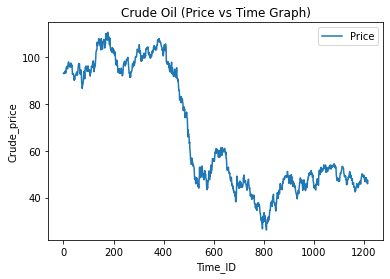

In [193]:
oil.plot()
plt.title("Crude Oil (Price vs Time Graph)")
plt.xlabel("Time_ID")
plt.ylabel("Crude_price")
plt.savefig("Oil_price.png")

plt.show()

### Moving Average

In [194]:
number_observation=len(Y) #number of obervation
moving_trend=[] # defining empety list
average_m=12    # moving average of trend
half_m=int(average_m/2)# for self use
trend=[np.nan]*number_observation # predefining list of trend of size number_of_observation


for i in range (number_observation-average_m+1):
    temp=stats.mean(Y[i:i+4])
    moving_trend.append(temp)
for j in range (number_observation-average_m):
    temp=stats.mean(moving_trend[j:j+2])
    trend[half_m +j] = temp

In [195]:
oil["trend"]=trend #adding coloum in dataframe

In [196]:
oil.head(16) # self test

,Date,Price,trend
0,02-01-2013,93.14,NaN
1,03-01-2013,92.97,NaN
2,04-01-2013,93.12,NaN
3,07-01-2013,93.20,NaN
4,08-01-2013,93.21,NaN
5,09-01-2013,93.08,NaN
6,10-01-2013,93.81,93.11625
7,11-01-2013,93.60,93.13875
8,14-01-2013,94.27,93.23875
9,15-01-2013,93.26,93.37500


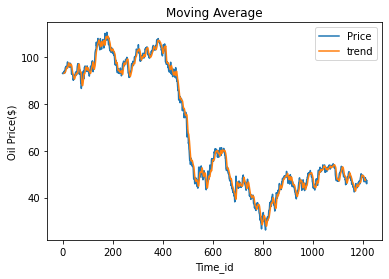

In [197]:
oil.plot()
plt.title("Moving Average")
plt.xlabel("Time_id")
plt.ylabel("Oil Price($)")
plt.savefig("Moving_average.png")
plt.show()

In [198]:
error=(Y-trend)**2
oil=oil.interpolate(method ='linear', limit_direction ='forward')
mean_moving_avg=stats.mean(error[6:-6])

### Exponential smoothing

In [199]:
alpha=0.3
trend_hat=[Y[0]]
for i in range (1,number_observation):
    temp=alpha*Y[i]+(1-alpha)*trend_hat[i-1]
    trend_hat.append(temp)

In [200]:
oil["trend_hat"]=trend_hat#adding coloum in dataframe

In [201]:
oil.pop("trend")

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
1212    47.485
1213    47.485
1214    47.485
1215    47.485
1216    47.485
Name: trend, Length: 1217, dtype: float64

In [202]:
oil.head()

,Date,Price,trend_hat
0,02-01-2013,93.14,93.140000
1,03-01-2013,92.97,93.089000
2,04-01-2013,93.12,93.098300
3,07-01-2013,93.20,93.128810
4,08-01-2013,93.21,93.153167


In [203]:
error2=(Y-trend_hat)**2

In [215]:
mean_exponential=stats.mean(error2)

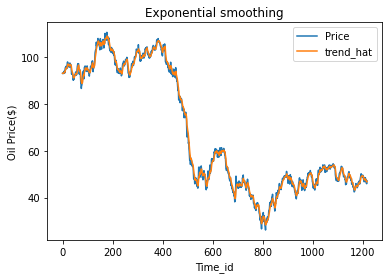

In [205]:
oil.plot()
plt.title("Exponential smoothing")
plt.xlabel("Time_id")
plt.ylabel("Oil Price($)")
plt.savefig("Exponential_smoothing.png")
plt.show()

### Quadratic Model

In [220]:
oil["x1"]=range(1,1+len(oil))
oil["x2"]=oil["x1"]**2

In [207]:
oil.head()

,Date,Price,trend_hat,x1,x2
0,02-01-2013,93.14,93.140000,1,1
1,03-01-2013,92.97,93.089000,2,4
2,04-01-2013,93.12,93.098300,3,9
3,07-01-2013,93.20,93.128810,4,16
4,08-01-2013,93.21,93.153167,5,25


In [ ]:
# By using lm function in value of Beta_0=116.8,beta_1=0.1197 and beta_2=4.813e-05
# code in R


#df=read.csv(file.choose(""))
# df2=data.frame(x1=seq(1,dim(df)[1]),x2=seq(1,dim(df)[1])**2)
# df2=cbind(df['Price'],df2)
# model=lm(Price~(x1+x2),df2)

In [208]:
Price_quadratic=116.8-0.1197*oil["x1"]+4.813e-05*oil['x2']

In [209]:
oil["Price_quadratic"]=Price_quadratic

In [210]:

oil.pop("trend_hat")
oil.pop("x2")
oil.pop("x1")


0          1
1          2
2          3
3          4
4          5
        ... 
1212    1213
1213    1214
1214    1215
1215    1216
1216    1217
Name: x1, Length: 1217, dtype: int32

In [211]:
oil.head()

,Date,Price,Price_quadratic
0,02-01-2013,93.14,116.680348
1,03-01-2013,92.97,116.560793
2,04-01-2013,93.12,116.441333
3,07-01-2013,93.20,116.321970
4,08-01-2013,93.21,116.202703


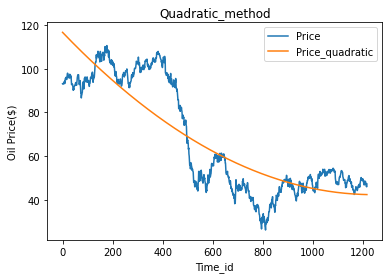

In [212]:
oil.plot()
plt.title("Quadratic_method")
plt.xlabel("Time_id")
plt.ylabel("Oil Price($)")
plt.savefig("Quadratic_method.png")
plt.show()

In [213]:
error3=(Y-oil["Price_quadratic"])**2

In [185]:
mean_quadratic=stats.mean(error3)

In [218]:
error_mean=pd.DataFrame({
    "Method":["Moving Average","Exponential smoothing","Quadratic Model"],
    "Mean Error":[mean_moving_avg,mean_exponential,mean_quadratic]
    
})

In [222]:
error_mean

,Method,Mean Error
0,Moving Average,4.396417
1,Exponential smoothing,1.291605
2,Quadratic Model,167.306456


In [223]:
oil.tail()

,Date,Price,Price_quadratic,x1,x2
1212,25-08-2017,47.65,42.420890,1213,1471369
1213,28-08-2017,46.40,42.418001,1214,1473796
1214,29-08-2017,46.46,42.415209,1215,1476225
1215,30-08-2017,45.96,42.412513,1216,1478656
1216,31-08-2017,47.26,42.409914,1217,1481089
